In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

from common import *

In [15]:
def quad1(n):
    return n * n + n + 41

def quad2(n):
    return n * n - 79 * n + 1601

[1601 1523 1447 1373 1301 1231 1163 1097 1033  971  911  853  797  743  691
  641  593  547  503  461  421  383  347  313  281  251  223  197  173  151
  131  113   97   83   71   61   53   47   43   41   41   43   47   53   61
   71   83   97  113  131  151  173  197  223  251  281  313  347  383  421
  461  503  547  593  641  691  743  797  853  911  971 1033 1097 1163 1231
 1301 1373 1447 1523 1601]


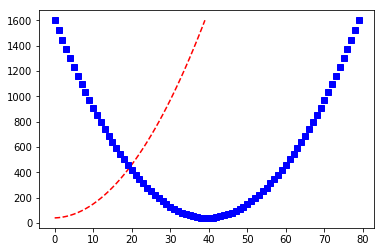

In [9]:
xs1 = np.arange(0, 40)
ys1 = quad1(xs1)
xs2 = np.arange(0, 80)
ys2 = quad2(xs2)
plt.plot(xs1, ys1, 'r--', xs2, ys2, 'bs')
plt.show()

In [28]:
PRIMES_LESS_THAN_1K = eratos_primes(1001)
PRIMES_LESS_THAN_2K = set(eratos_primes(2002))

def count_consecutive_primes(a, b):
    for i in range(0, 81):
        p = i * i + a * i + b
        if p not in PRIMES_LESS_THAN_2K:
            return i
    assert(False)
    
assert(count_consecutive_primes(1, 41) == 40)
assert(count_consecutive_primes(-79, 1601) == 80)

In [29]:
# So we have an equation of the form n * n + a * n + b
# From that follows that
# 1) b - prime
# 2) a + b + 1 - prime
# As |a| <= 1000 && |b| <= 1000 we can just iterate over all primes <= 2001 given a chosen b
def solve():
    max_prime_value = max(PRIMES_LESS_THAN_2K)
    result = 41
    consecutive_primes = 40
    for b in tqdm.tqdm(PRIMES_LESS_THAN_1K):
        for p in PRIMES_LESS_THAN_2K:
            a = p - b - 1
            if abs(a) > 1000:
                continue
            new_count = count_consecutive_primes(a, b)
            if new_count > consecutive_primes:
                consecutive_primes = new_count
                result = a * b
    print(result)

In [26]:
solve()

100%|██████████| 168/168 [00:00<00:00, 1776.03it/s]

-59231
